<a href="https://colab.research.google.com/github/MohammadAli-Balaj/Time_Series/blob/main/Facebook_Prophet_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Time Series Analysis with Facebook Prophet**



---



---


# 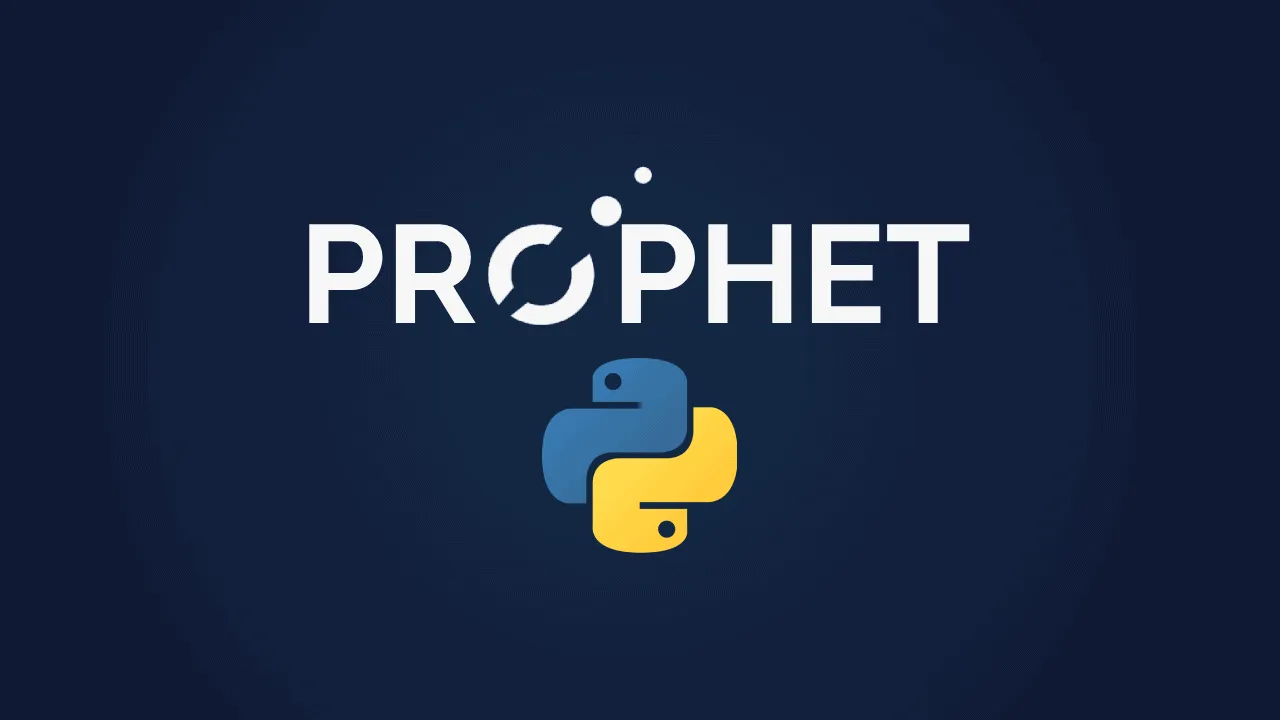




---



---


### Author: Mohammad-Ali Balaj



---






### Importing of needed Python libraries:

In [ ]:
from prophet import Prophet
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### The provided data seems to be a mediacal dataset which describes confirmed cases of a disease type and it's corresponding  fatalities. In this notebook, the model will be predicting the cumulative number of mentioned cases and the number of resulting deaths for future dates, using Facebook Prophet. The dataset is already uploaded in google drive in order to use it in this notebook:

In [ ]:
from google.colab import drive
drive.mount('data',force_remount=True)

Mounted at data


### Define data path:

In [ ]:
path="/content/data/MyDrive/Colab Notebooks/data.csv"

### Loading the dataset:

In [ ]:
df=pd.read_csv(path)

### Exploring the dataset:

In [ ]:
df.head(10)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
5,2020-01-26,5,0
6,2020-01-27,5,0
7,2020-01-28,5,0
8,2020-01-29,5,0
9,2020-01-30,6,0


### Preparing and transforming data in the desired form in order to predict cases:

In [ ]:
df.drop(columns=['deaths'], inplace=True)
df['ds']=df['date']
df['y']=df['cases']
df.drop(columns=['date','cases'], inplace=True)

In [ ]:
df.head()

,ds,y
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


### Creating model and fit it with the data in ordet to predict cases:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


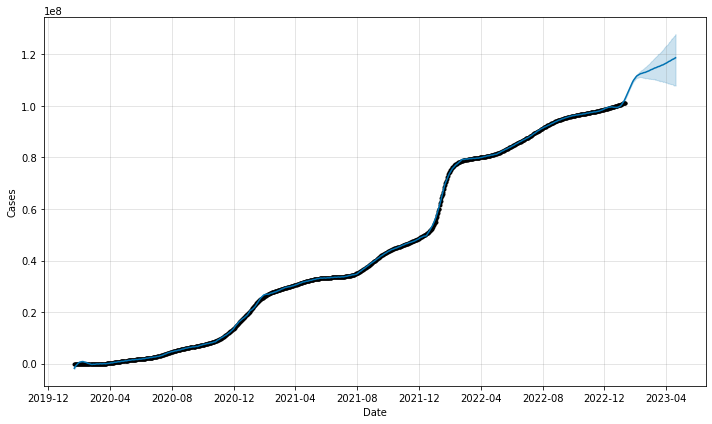

In [ ]:
model_cases=Prophet()
model_cases.fit(df)
future_cases = model_cases.make_future_dataframe(periods=99,freq='D')
forecast=model_cases.predict(future_cases)
fig_Confirmed = model_cases.plot(forecast,xlabel = "Date",ylabel = "Cases")

### Loading the dataset again for deaths:

In [ ]:
df=pd.read_csv(path)

### Preparing and transforming data in the desired form in order to predict deaths:

In [ ]:
df.drop(columns=['cases'], inplace=True)
df['ds']=df['date']
df['y']=df['deaths']
df.drop(columns=['date','deaths'], inplace=True)

In [ ]:
df.head()

,ds,y
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0


### Creating model and fit it with the data in ordet to predict deaths:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


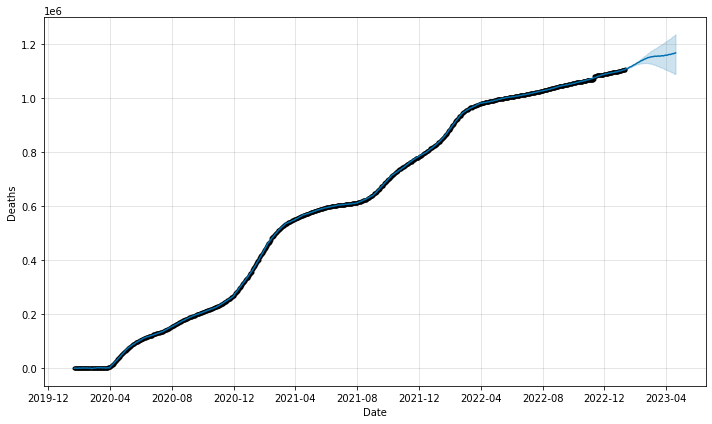

In [ ]:
model_deaths=Prophet()
model_deaths.fit(df)
future_deaths = model_deaths.make_future_dataframe(periods=99,freq='D')
forecast=model_deaths.predict(future_deaths)
fig_Deaths = model_deaths.plot(forecast,xlabel = "Date",ylabel = "Deaths")

In [ ]:
print("ran successfully!")

ran successfully!
